## 6.1 Reading and Writing Data in Text Format

pandas features a number of functions for reading tabular data as a DataFrame
object. Table 6-1 summarizes some of them, though read_csv and read_table are
likely the ones you’ll use the most.

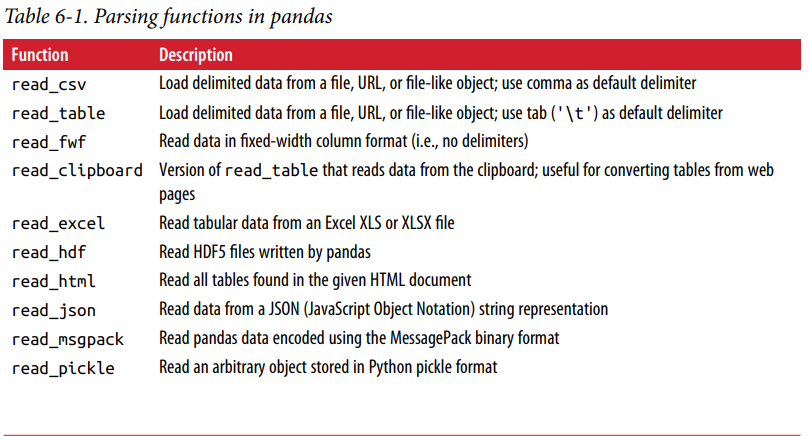

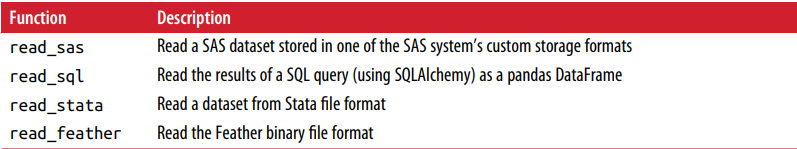

The optional arguments for these functions may fall into
a few categories:

Indexing   
    
Can treat one or more columns as the returned DataFrame, and whether to get
column names from the file, the user, or not at all.

Type inference and data conversion    
     
This includes the user-defined value conversions and custom list of missing value
markers.

Datetime parsing    
     
Includes combining capability, including combining date and time information
spread over multiple columns into a single column in the result.

Iterating    
    
Support for iterating over chunks of very large files.

Unclean data issues     
    
Skipping rows or a footer, comments, or other minor things like numeric data
with thousands separated by commas.

Because of how messy data in the real world can be, some of the data loading functions (especially read_csv) have grown very complex in their options over time. It’s
normal to feel overwhelmed by the number of different parameters (read_csv has
over 50 as of this writing). The online pandas documentation has many examples
about how each of them works, so if you’re struggling to read a particular file, there
might be a similar enough example to help you find the right parameters.


In [21]:
!type ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [10]:
# from os import system 
# system("cat pydata-book-master/ch06/ex1.csv")

Since this is comma-delimited, we can use read_csv to read it into a DataFrame:

In [24]:
import pandas as pd
df = pd.read_csv('ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


We could also have used read_table and specified the delimiter


In [26]:
pd.read_table('ex1.csv', sep=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [2]:
directory="C:\\Users\\ankit19.gupta\\OneDrive - Reliance Corporate IT Park Limited\\Desktop\\Practice_Code\\Python_Practice\\Python_For_Data_Analysis\\pydata-book-master"

A file will not always have a header row. Consider this file:

In [44]:
directory+"\\ch06\\ex2.csv"

'C:\\Users\\ankit19.gupta\\OneDrive - Reliance Corporate IT Park Limited\\Desktop\\Practice_Code\\Python_Practice\\Python_For_Data_Analysis\\pydata-book-master\\ch06\\ex2.csv'

In [46]:
! type "C:\\Users\\ankit19.gupta\\OneDrive - Reliance Corporate IT Park Limited\\Desktop\\Practice_Code\\Python_Practice\\Python_For_Data_Analysis\\pydata-book-master\\ch06\\ex2.csv"

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [49]:
pd.read_csv(directory+'\\ch06\\ex2.csv', header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [50]:
pd.read_csv(directory+'\\ch06\\ex2.csv', names=['a', 'b', 'c', 'd', 'message'])


,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Suppose you wanted the message column to be the index of the returned DataFrame.
You can either indicate you want the column at index 4 or named 'message' using
the index_col argument:


In [51]:
names = ['a', 'b', 'c', 'd', 'message']

In [52]:
pd.read_csv(directory+'\\ch06\\ex2.csv', names=names, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In the event that you want to form a hierarchical index from multiple columns, pass a
list of column numbers or names:

In [53]:
!type "C:\\Users\\ankit19.gupta\\OneDrive - Reliance Corporate IT Park Limited\\Desktop\\Practice_Code\\Python_Practice\\Python_For_Data_Analysis\\pydata-book-master\\ch06\\csv_mindex.csv"

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


In [54]:
parsed = pd.read_csv(directory+'\\ch06\\csv_mindex.csv',index_col=['key1', 'key2'])

In [55]:
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In some cases, a table might not have a fixed delimiter, using whitespace or some
other pattern to separate fields. Consider a text file that looks like this:

In [56]:
list(open(directory+'\\ch06\\ex3.txt'))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

While you could do some munging by hand, the fields here are separated by a variable amount of whitespace. In these cases, you can pass a regular expression as a
delimiter for read_table. This can be expressed by the regular expression \s+, so we
have then:

In [57]:
result = pd.read_table(directory+'\\ch06\\ex3.txt', sep='\s+')
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


Because there was one fewer column name than the number of data rows,
read_table infers that the first column should be the DataFrame’s index in this special case.

The parser functions have many additional arguments to help you handle the wide
variety of exception file formats that occur (see a partial listing in Table 6-2). For
example, you can skip the first, third, and fourth rows of a file with skiprows:


In [59]:
!type "C:\\Users\\ankit19.gupta\\OneDrive - Reliance Corporate IT Park Limited\\Desktop\\Practice_Code\\Python_Practice\\Python_For_Data_Analysis\\pydata-book-master\\ch06\\ex4.csv"

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [60]:
pd.read_csv(directory+'\\ch06\\ex4.csv', skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Handling missing values is an important and frequently nuanced part of the file parsing process. Missing data is usually either not present (empty string) or marked by
some sentinel value. By default, pandas uses a set of commonly occurring sentinels,
such as NA and NULL:

In [61]:
!type "C:\\Users\\ankit19.gupta\\OneDrive - Reliance Corporate IT Park Limited\\Desktop\\Practice_Code\\Python_Practice\\Python_For_Data_Analysis\\pydata-book-master\\ch06\\ex5.csv"

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo


In [62]:
result = pd.read_csv(directory+'\\ch06\\ex5.csv')


In [63]:
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [64]:
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


The na_values option can take either a list or set of strings to consider missing
values:


In [65]:
result = pd.read_csv(directory+'\\ch06\\ex5.csv', na_values=['NULL'])
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


Different NA sentinels can be specified for each column in a dict:

In [66]:
sentinels = {'message': ['foo', 'NA'], 'something': ['two']}
pd.read_csv(directory+'\\ch06\\ex5.csv', na_values=sentinels)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


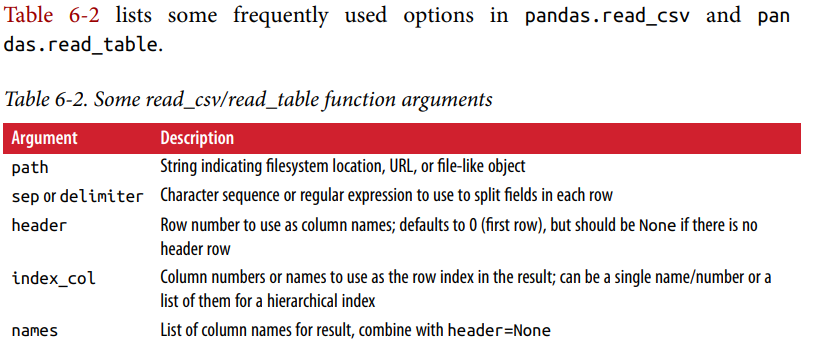

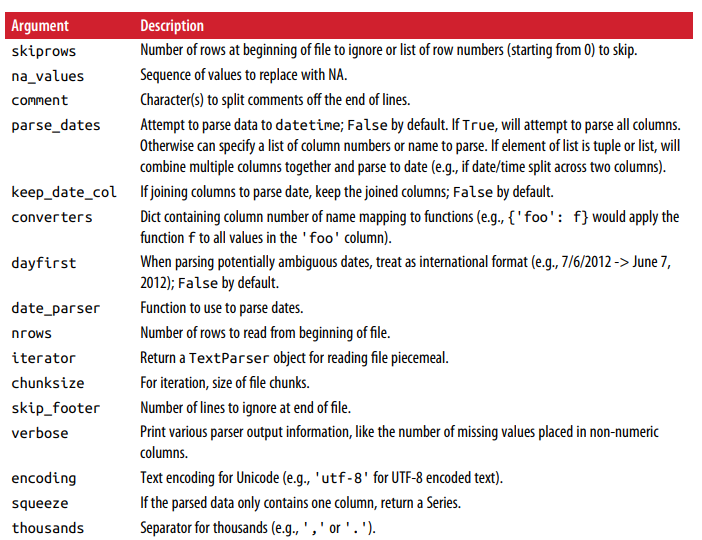

## Reading Text Files in Pieces

When processing very large files or figuring out the right set of arguments to correctly process a large file, you may only want to read in a small piece of a file or iterate
through smaller chunks of the file.    
    
Before we look at a large file, we make the pandas display settings more compact

In [1]:
import pandas as pd
pd.options.display.max_rows = 10

In [4]:
result = pd.read_csv(directory+'\\ch06\\ex6.csv')
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


To read a file in pieces, specify a chunksize as a number of rows:

In [5]:
chunker = pd.read_csv(directory+'\\ch06\\ex6.csv', chunksize=1000)
chunker

The TextParser object returned by read_csv allows you to iterate over the parts of
the file according to the chunksize. For example, we can iterate over ex6.csv, aggregating the value counts in the 'key' column like so:

In [7]:
chunker = pd.read_csv(directory+'\\ch06\\ex6.csv', chunksize=1000)

In [8]:
tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0)
tot = tot.sort_values(ascending=False)

C:\Users\ankit19.gupta\OneDrive - Reliance Corporate IT Park Limited\Desktop\Practice_Code\Python_Practice\Python_For_Data_Analysis\myenv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [9]:
tot

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
     ...  
5    157.0
2    152.0
0    151.0
9    150.0
1    146.0
Length: 36, dtype: float64

TextParser is also equipped with a get_chunk method that enables you to read
pieces of an arbitrary size.

## Writing Data to Text Format

Data can also be exported to a delimited format. Let’s consider one of the CSV files
read before:

In [10]:
data = pd.read_csv(directory+'\\ch06\\ex5.csv')
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


Using DataFrame’s to_csv method, we can write the data out to a comma-separated
file:

In [12]:
data.to_csv(directory+'\\ch06\\out.csv')

In [13]:
!type "C:\\Users\\ankit19.gupta\\OneDrive - Reliance Corporate IT Park Limited\\Desktop\\Practice_Code\\Python_Practice\\Python_For_Data_Analysis\\pydata-book-master\\ch06\\out.csv"


,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


Other delimiters can be used, of course (writing to sys.stdout so it prints the text
result to the console):

In [14]:
import sys
data.to_csv(sys.stdout, sep='|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


Missing values appear as empty strings in the output. You might want to denote them
by some other sentinel value:


In [15]:
data.to_csv(sys.stdout, na_rep='NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


With no other options specified, both the row and column labels are written. Both of
these can be disabled:

In [16]:
data.to_csv(sys.stdout, index=False, header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


Series also has a to_csv method:

In [25]:
import numpy as np
dates = pd.date_range('1/1/2000', periods=7)
ts = pd.Series(np.arange(7), index=dates)
ts.to_csv(directory+'\\ch06\\tseries.csv',header=None)

In [26]:
!type "C:\\Users\\ankit19.gupta\\OneDrive - Reliance Corporate IT Park Limited\\Desktop\\Practice_Code\\Python_Practice\\Python_For_Data_Analysis\\pydata-book-master\\ch06\\tseries.csv"

2000-01-01,0
2000-01-02,1
2000-01-03,2
2000-01-04,3
2000-01-05,4
2000-01-06,5
2000-01-07,6


## Working with Delimited Formats

It’s possible to load most forms of tabular data from disk using functions like pan
das.read_table. In some cases, however, some manual processing may be necessary.
It’s not uncommon to receive a file with one or more malformed lines that trip up
read_table. To illustrate the basic tools, consider a small CSV file:

In [27]:
!type "C:\\Users\\ankit19.gupta\\OneDrive - Reliance Corporate IT Park Limited\\Desktop\\Practice_Code\\Python_Practice\\Python_For_Data_Analysis\\pydata-book-master\\ch06\\ex7.csv"

"a","b","c"
"1","2","3"
"1","2","3","4"


For any file with a single-character delimiter, you can use Python’s built-in csv module. To use it, pass any open file or file-like object to csv.reader:


In [28]:
import csv
f = open(directory+'\\ch06\\ex7.csv')
reader = csv.reader(f)
reader

Iterating through the reader like a file yields tuples of values with any quote characters removed:


In [29]:
for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3', '4']


In [30]:
with open(directory+'\\ch06\\ex7.csv') as f:
    lines = list(csv.reader(f))

In [31]:
header, values = lines[0], lines[1:]

In [32]:
data_dict = {h: v for h, v in zip(header, zip(*values))}
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

CSV files come in many different flavors. To define a new format with a different
delimiter, string quoting convention, or line terminator, we define a simple subclass
of csv.Dialect:

In [37]:
f=open(directory+'\\ch06\\ex7.csv')
class my_dialect(csv.Dialect):
    lineterminator = '\n'
    delimiter = ';'
    quotechar = '"'
    quoting = csv.QUOTE_MINIMAL
reader = csv.reader(f, dialect=my_dialect)

We can also give individual CSV dialect parameters as keywords to csv.reader
without having to define a subclass:

In [38]:
reader = csv.reader(f, delimiter='|')

In [39]:
reader

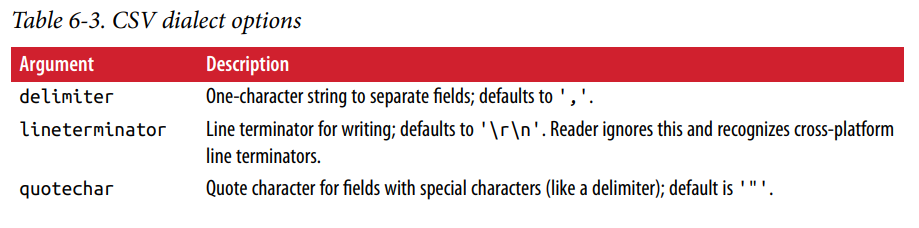

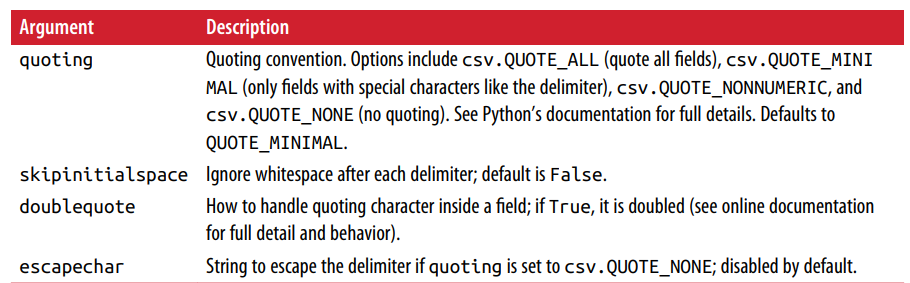

To write delimited files manually, you can use csv.writer. It accepts an open, writable file object and the same dialect and format options as csv.reader:

In [41]:
with open('mydata.csv', 'w') as f:
    writer = csv.writer(f, dialect=my_dialect)
    writer.writerow(('one', 'two', 'three'))
    writer.writerow(('1', '2', '3'))
    writer.writerow(('4', '5', '6'))
    writer.writerow(('7', '8', '9'))

## JSON Data


JSON (short for JavaScript Object Notation) has become one of the standard formats
for sending data by HTTP request between web browsers and other applications. It is
a much more free-form data format than a tabular text form like CSV. Here is an
example:


In [42]:
obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
 {"name": "Katie", "age": 38,
 "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

JSON is very nearly valid Python code with the exception of its null value null and
some other nuances (such as disallowing trailing commas at the end of lists). The
basic types are objects (dicts), arrays (lists), strings, numbers, booleans, and nulls. All
of the keys in an object must be strings. There are several Python libraries for reading
and writing JSON data. I’ll use json here, as it is built into the Python standard
library. To convert a JSON string to Python form, use json.loads:

In [43]:
import json
result = json.loads(obj)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

json.dumps, on the other hand, converts a Python object back to JSON:

In [44]:
asjson = json.dumps(result)

In [45]:
asjson

'{"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]}'

How you convert a JSON object or list of objects to a DataFrame or some other data
structure for analysis will be up to you. Conveniently, you can pass a list of dicts
(which were previously JSON objects) to the DataFrame constructor and select a sub‐
set of the data fields:


In [46]:
siblings = pd.DataFrame(result['siblings'], columns=['name', 'age'])
siblings

,name,age
0,Scott,30
1,Katie,38


The pandas.read_json can automatically convert JSON datasets in specific arrangements into a Series or DataFrame. For example:

In [48]:
 !type "C:\\Users\\ankit19.gupta\\OneDrive - Reliance Corporate IT Park Limited\\Desktop\\Practice_Code\\Python_Practice\\Python_For_Data_Analysis\\pydata-book-master\\ch06\\sample1.json"

{
    "fruit": "Apple",
    "size": "Large",
    "color": "Red"
}


In [51]:
# data = pd.read_json(directory+'\\ch06\\sample1.json')
# data

If you need to export data from pandas to JSON, one way is to use the to_json methods on Series and DataFrame:

In [52]:
# print(data.to_json())
# print(data.to_json(orient='records'))

## XML and HTML: Web Scraping

Python has many libraries for reading and writing data in the ubiquitous HTML and
XML formats. Examples include lxml, Beautiful Soup, and html5lib. While lxml is
comparatively much faster in general, the other libraries can better handle malformed
HTML or XML files.

pandas has a built-in function, read_html, which uses libraries like lxml and Beautiful Soup to automatically parse tables out of HTML files as DataFrame objects. To
show how this works, I downloaded an HTML file (used in the pandas documentation) from the United States FDIC government agency showing bank failures.1 First,
you must install some additional libraries used by read_html:

In [54]:
# !pip install lxml
# !pip install beautifulsoup4 html5lib

The pandas.read_html function has a number of options, but by default it searches
for and attempts to parse all tabular data contained within <table> tags. The result is
a list of DataFrame objects:

In [56]:
tables = pd.read_html('table.html')
len(tables)

1

In [57]:
failures = tables[0]

In [58]:
failures.head()

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
0,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,"November 3, 2023",10545
1,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.","July 28, 2023",10544
2,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.","May 1, 2023",10543
3,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.","March 12, 2023",10540
4,Silicon Valley Bank,Santa Clara,CA,24735,First–Citizens Bank & Trust Company,"March 10, 2023",10539


In [60]:
failures.columns

Index(['Bank NameBank', 'CityCity', 'StateSt', 'CertCert',
       'Acquiring InstitutionAI', 'Closing DateClosing', 'FundFund'],
      dtype='object')

In [61]:
close_timestamps = pd.to_datetime(failures['Closing DateClosing'])
close_timestamps.dt.year.value_counts()

2023    5
2020    4
2019    3
Name: Closing DateClosing, dtype: int64

## Parsing XML with lxml.objectify

XML (eXtensible Markup Language) is another common structured data format supporting hierarchical, nested data with metadata. The book you are currently reading
was actually created from a series of large XML documents.

Earlier, I showed the pandas.read_html function, which uses either lxml or Beautiful
Soup under the hood to parse data from HTML. XML and HTML are structurally
similar, but XML is more general. Here, I will show an example of how to use lxml to
parse data from a more general XML format.


In [62]:
from lxml import objectify
path = 'Performance_MNR.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()

In [63]:
root

<Element INFO at 0x2618a7ae848>

In [64]:
root.INDICATOR

<Element INDICATOR at 0x2618a7a2548>

In [65]:
data = []
skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ','DESIRED_CHANGE', 'DECIMAL_PLACES']
for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)

In [66]:
perf = pd.DataFrame(data)


In [67]:
perf.head()

,AGENCY_NAME,INDICATOR_NAME,DESCRIPTION,PERIOD_YEAR,PERIOD_MONTH,CATEGORY,FREQUENCY,INDICATOR_UNIT,YTD_TARGET,YTD_ACTUAL,MONTHLY_TARGET,MONTHLY_ACTUAL
0,Metro-North Railroad,Escalator Availability,Percent of the time that escalators are operat...,2011,12,Service Indicators,M,%,97.0,,97.0,


XML data can get much more complicated than this example. Each tag can have
metadata, too. Consider an HTML link tag, which is also valid XML:

In [68]:
from io import StringIO
tag = '<a href="http://www.google.com">Google</a>'
root = objectify.parse(StringIO(tag)).getroot()

In [69]:
root.get('href')

'http://www.google.com'

In [70]:
root.text

'Google'

## 6.2 Binary Data Formats

One of the easiest ways to store data (also known as serialization) efficiently in binary
format is using Python’s built-in pickle serialization. pandas objects all have a
to_pickle method that writes the data to disk in pickle format:

In [71]:
frame = pd.read_csv(directory+'\\ch06\\ex1.csv')
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [72]:
frame.to_pickle('frame_pickle')

You can read any “pickled” object stored in a file by using the built-in pickle directly,
or even more conveniently using pandas.read_pickle:

In [73]:
pd.read_pickle('frame_pickle')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


pickle is only recommended as a short-term storage format. The
problem is that it is hard to guarantee that the format will be stable
over time; an object pickled today may not unpickle with a later
version of a library. We have tried to maintain backward compatibility when possible, but at some point in the future it may be necessary to “break” the pickle format.

Some other storage formats for pandas or NumPy data include:     
       
bcolz:    
        
A compressable column-oriented binary format based on the Blosc compression
library.    
    
Feather:    
        
A cross-language column-oriented file format I designed with the R programming community’s Hadley Wickham. Feather uses the Apache Arrow columnar
memory format

## Using HDF5 Format

HDF5 is a well-regarded file format intended for storing large quantities of scientific
array data. It is available as a C library, and it has interfaces available in many other
languages, including Java, Julia, MATLAB, and Python. The “HDF” in HDF5 stands
for hierarchical data format. Each HDF5 file can store multiple datasets and supporting metadata. Compared with simpler formats, HDF5 supports on-the-fly compression with a variety of compression modes, enabling data with repeated patterns to be
stored more efficiently. HDF5 can be a good choice for working with very large datasets that don’t fit into memory, as you can efficiently read and write small sections of
much larger arrays.

While it’s possible to directly access HDF5 files using either the PyTables or h5py
libraries, pandas provides a high-level interface that simplifies storing Series and
DataFrame object. The HDFStore class works like a dict and handles the low-level
details:

In [13]:
import pandas as pd
import numpy as np
frame = pd.DataFrame({'a': np.random.randn(100)})
store = pd.HDFStore('mydata.h5')
store['obj1'] = frame
store['obj1_col'] = frame['a']
store

<class 'pandas.io.pytables.HDFStore'>
File path: mydata.h5

In [14]:
# !conda install pytables

In [15]:
# !pip install --user tables

Objects contained in the HDF5 file can then be retrieved with the same dict-like API:

In [16]:
store['obj1']

,a
0,-1.092360
1,-2.203172
2,-1.035297
3,0.046597
4,0.762753
...,...
95,-0.586159
96,0.130564
97,-1.002235
98,-0.667696


HDFStore supports two storage schemas, 'fixed' and 'table'. The latter is generally
slower, but it supports query operations using a special syntax:

In [17]:
store.put('obj2', frame, format='table')
store.select('obj2', where=['index >= 10 and index <= 15'])

,a
10,-0.074819
11,-1.504490
12,-0.462523
13,-0.656356
14,-0.323957
15,0.314711


In [18]:
store.close()

The put is an explicit version of the store['obj2'] = frame method but allows us to
set other options like the storage format.     
    
The pandas.read_hdf function gives you a shortcut to these tools:

In [19]:
frame.to_hdf('mydata.h5', 'obj3', format='table')

In [20]:
 pd.read_hdf('mydata.h5', 'obj3', where=['index < 5'])

,a
0,-1.092360
1,-2.203172
2,-1.035297
3,0.046597
4,0.762753


If you are processing data that is stored on remote servers, like
Amazon S3 or HDFS, using a different binary format designed for
distributed storage like Apache Parquet may be more suitable.
Python for Parquet and other such storage formats is still developing, so I do not write about them in this book.

If you work with large quantities of data locally, I would encourage you to explore
PyTables and h5py to see how they can suit your needs. Since many data analysis
problems are I/O-bound (rather than CPU-bound), using a tool like HDF5 can massively accelerate your applications.

HDF5 is not a database. It is best suited for write-once, read-many
datasets. While data can be added to a file at any time, if multiple
writers do so simultaneously, the file can become corrupted.


## Reading Microsoft Excel Files

pandas also supports reading tabular data stored in Excel 2003 (and higher) files
using either the ExcelFile class or pandas.read_excel function. Internally these
tools use the add-on packages xlrd and openpyxl to read XLS and XLSX files, respectively. You may need to install these manually with pip or conda.   
    
To use ExcelFile, create an instance by passing a path to an xls or xlsx file:

In [4]:
import pandas as pd
xlsx = pd.ExcelFile(directory+'\\ch06\\file_example_XLSX_10.xlsx')

In [ ]:
# !pip install xlrd==1.1.0

Data stored in a sheet can then be read into DataFrame with parse:

In [5]:
pd.read_excel(xlsx, 'Sheet1')

,0,First Name,Last Name,Gender,Country,Age,Date,Id
0,1,Dulce,Abril,Female,United States,32,15/10/2017,1562
1,2,Mara,Hashimoto,Female,Great Britain,25,16/08/2016,1582
2,3,Philip,Gent,Male,France,36,21/05/2015,2587
3,4,Kathleen,Hanner,Female,United States,25,15/10/2017,3549
4,5,Nereida,Magwood,Female,United States,58,16/08/2016,2468
5,6,Gaston,Brumm,Male,United States,24,21/05/2015,2554
6,7,Etta,Hurn,Female,Great Britain,56,15/10/2017,3598
7,8,Earlean,Melgar,Female,United States,27,16/08/2016,2456
8,9,Vincenza,Weiland,Female,United States,40,21/05/2015,6548


To write pandas data to Excel format, you must first create an ExcelWriter, then
write data to it using pandas objects’ to_excel method:

In [8]:
writer = pd.ExcelWriter(directory+'\\ch06\\write_excel.xlsx')

In [9]:
# !pip install openpyxl

In [13]:
import numpy as np
frame = pd.DataFrame({'a': np.random.randn(100)})
frame.to_excel(writer, 'Sheet1')
writer.save()

You can also pass a file path to to_excel and avoid the ExcelWriter:

In [16]:
frame.to_excel(directory+'\\ch06\\write_excel1.xlsx')

## 6.3 Interacting with Web APIs

Many websites have public APIs providing data feeds via JSON or some other format.
There are a number of ways to access these APIs from Python; one easy-to-use
method that I recommend is the requests package.

To find the last 30 GitHub issues for pandas on GitHub, we can make a GET HTTP
request using the add-on requests library:

In [12]:
import requests
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
#url ='https://www.geeksforgeeks.org/'
resp = requests.get(url)
resp

<Response [200]>

The Response object’s json method will return a dictionary containing JSON parsed
into native Python objects:

In [13]:
data = resp.json()
data[0]['title']

'BUG: concat with datetime index returns Series instead of scalar if microsecond=0'

In [14]:
data

[{'url': 'https://api.github.com/repos/pandas-dev/pandas/issues/57835',
  'repository_url': 'https://api.github.com/repos/pandas-dev/pandas',
  'labels_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/57835/labels{/name}',
  'comments_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/57835/comments',
  'events_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/57835/events',
  'html_url': 'https://github.com/pandas-dev/pandas/issues/57835',
  'id': 2185343261,
  'node_id': 'I_kwDOAA0YD86CQbEd',
  'number': 57835,
  'title': 'BUG: concat with datetime index returns Series instead of scalar if microsecond=0',
  'user': {'login': 'davetapley',
   'id': 48232,
   'node_id': 'MDQ6VXNlcjQ4MjMy',
   'avatar_url': 'https://avatars.githubusercontent.com/u/48232?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/davetapley',
   'html_url': 'https://github.com/davetapley',
   'followers_url': 'https://api.github.com/users/davetapley/followers',
  

Each element in data is a dictionary containing all of the data found on a GitHub
issue page (except for the comments). We can pass data directly to DataFrame and
extract fields of interest:

In [20]:
issues = pd.DataFrame(data, columns=['number', 'title','labels', 'state'])
issues

,number,title,labels,state
0,56630,QST: stack overflow,"[{'id': 34444536, 'node_id': 'MDU6TGFiZWwzNDQ0...",open
1,56629,BUG: inconsistent behaviour of 'to_timedelta' ...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
2,56628,TYP: more simple return types from ruff,[],open
3,56627,added negative value support in pct_changes of...,[],open
4,56626,TST: Remove arraymanager markers,"[{'id': 127685, 'node_id': 'MDU6TGFiZWwxMjc2OD...",open
5,56625,TST/CLN: Remove more seldom used fixtures,"[{'id': 127685, 'node_id': 'MDU6TGFiZWwxMjc2OD...",open
6,56622,"DOC: ""Copy On Write: Patterns to avoid"" confusion","[{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OT...",open
7,56619,ENH/PERF: dispatch is_monotonic_increasing / d...,"[{'id': 8935311, 'node_id': 'MDU6TGFiZWw4OTM1M...",open
8,56618,ENH: Add option to use absolute value in pct_c...,"[{'id': 76812, 'node_id': 'MDU6TGFiZWw3NjgxMg=...",open
9,56616,BUG: Add limit_area to EA ffill/bfill,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open


With a bit of elbow grease, you can create some higher-level interfaces to common
web APIs that return DataFrame objects for easy analysis.

## 6.4 Interacting with Databases

In a business setting, most data may not be stored in text or Excel files. SQL-based
relational databases (such as SQL Server, PostgreSQL, and MySQL) are in wide use,
and many alternative databases have become quite popular. The choice of database is
usually dependent on the performance, data integrity, and scalability needs of an
application.
Loading data from SQL into a DataFrame is fairly straightforward, and pandas has
some functions to simplify the process. As an example, I’ll create a SQLite database
using Python’s built-in sqlite3 driver:


In [22]:
import sqlite3
query = """CREATE TABLE test (a VARCHAR(20), b VARCHAR(20), c REAL, d INTEGER );"""
con = sqlite3.connect('mydata.sqlite')
con.execute(query)

In [23]:
con.commit()

Then, insert a few rows of data:

In [24]:
data = [('Atlanta', 'Georgia', 1.25, 6),('Tallahassee', 'Florida', 2.6, 3),('Sacramento', 'California', 1.7, 5)]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit()

Most Python SQL drivers (PyODBC, psycopg2, MySQLdb, pymssql, etc.) return a list
of tuples when selecting data from a table:


In [25]:
cursor = con.execute('select * from test')
rows = cursor.fetchall()
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

You can pass the list of tuples to the DataFrame constructor, but you also need the
column names, contained in the cursor’s description attribute:

In [26]:
cursor.description

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None))

In [27]:
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


The SQLAlchemy project is a popular Python SQL toolkit that abstracts
away many of the common differences between SQL databases. pandas has a
read_sql function that enables you to read data easily from a general SQLAlchemy
connection. Here, we’ll connect to the same SQLite database with SQLAlchemy and
read data from the table created before:

In [30]:
import sqlalchemy as sqla
db = sqla.create_engine('sqlite:///mydata.sqlite')
pd.read_sql('select * from test', db)

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [31]:
# !pip install sqlalchemy

In [21]:
import urllib.request
import json 

# Bitcoin Genesis Block Transactions
your_url = 'https://blockchain.info/rawaddr/12c6DSiU4Rq3P4ZxziKxzrL5LmMBrzjrJX'

with urllib.request.urlopen(your_url) as url:
    data = json.loads(url.read().decode())
    print(data)

{'hash160': '119b098e2e980a229e139a9ed01a469e518e6f26', 'address': '12c6DSiU4Rq3P4ZxziKxzrL5LmMBrzjrJX', 'n_tx': 196, 'n_unredeemed': 196, 'total_received': 5135149307, 'total_sent': 0, 'final_balance': 5135149307, 'txs': [{'hash': 'a860d48af657f58824483f1e1727158ef3fe9232b6530a2417751d72d90ba66e', 'ver': 2, 'vin_sz': 2, 'vout_sz': 2, 'size': 303, 'weight': 810, 'fee': 3857, 'relayed_by': '0.0.0.0', 'lock_time': 0, 'tx_index': 3893102157644718, 'double_spend': False, 'time': 1709807968, 'block_index': 833561, 'block_height': 833561, 'inputs': [{'sequence': 4294967295, 'witness': '01406768f6f4398ef24d3a2edbc399faffccd2cad9c3c74bb788c93f05d139383e672b0010c62d93ad788cdda071d99bd3b5063484888d2a1558933dee1deb5d98ec', 'script': '', 'index': 0, 'prev_out': {'addr': 'bc1ppvlanmu7rg9manfzwerfm8sdcwfrqxu6sqryjky7lemwg9v7rdtqmxmrnq', 'n': 0, 'script': '51200b3fd9ef9e1a0bbecd2276469d9e0dc392301b9a800649589efe76e4159e1b56', 'spending_outpoints': [{'n': 0, 'tx_index': 3893102157644718}], 'spent': Tr